         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971         1.122813   
min

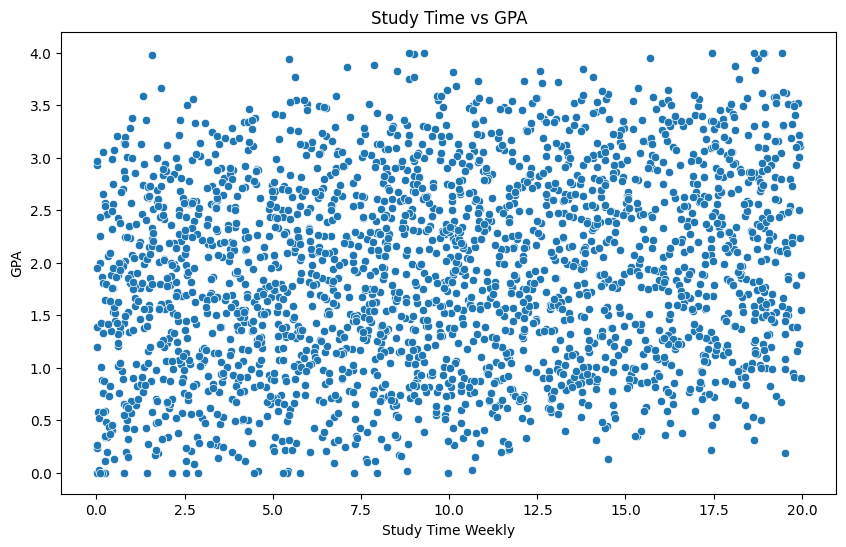

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Student_performance_data _.csv')

# Basic statistics
print(df.describe())

# Scatter plot of StudyTimeWeekly vs GPA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='StudyTimeWeekly', y='GPA', data=df)
plt.title('Study Time vs GPA')
plt.xlabel('Study Time Weekly')
plt.ylabel('GPA')
plt.show()

In [14]:
import numpy as np

class OurNeuralNetwork:
# A neural network with:
#- 2 inputs
#- a hidden layer with 2 neurons (h1, h2)
#- an output layer with 1 neuron (o1)
#- Each neuron has the same weights and bias:
#- w = [0, 1]
#- b = 0

    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
        
        # The Neuron class here is from the previous section
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        
        # The inputs for o1 are the outputs from h1 and h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1 

network = OurNeuralNetwork()
x = np.array([2, 3]) # x1 = 2, x2 = 3
print(n.feedforward(x)) # 0.9990889488055994

0.9990889488055994


In [12]:
import numpy as np

def mse_loss(y_true, y_pred):
    # y_true and y_pred are numpy arrays of the same length.
    return ((y_true - y_pred) ** 2).mean()
    
y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])

print(mse_loss(y_true, y_pred)) # 0.5

0.5


In [14]:
import numpy as np

def sigmoid(x):
    # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))
        
def deriv_sigmoid(x):
    # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
    fx = sigmoid(x)
    return fx * (1 - fx)
        
def mse_loss(y_true, y_pred):
    # y_true and y_pred are numpy arrays of the same length.
    return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
    # A neural network with:
    #- 2 inputs, a hidden layer with 2 neurons (h1, h2), an output layer with 1 neuron (o1)
    def __init__(self):
        # Weights
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()
        # Biases
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()
    
    def feedforward(self, x):
        # x is a numpy array with 2 elements.
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1

    def train(self, data, all_y_trues):
        # - data is a (n x 2) numpy array, n = # of samples in the dataset.
        #- all_y_trues is a numpy array with n elements.
        #Elements in all_y_trues correspond to those in data.
        learn_rate = 0.1
        epochs = 1000  # number of times to loop through the entire dataset
        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                # --- Do a feedforward (we'll need these values later)
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)
                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)
                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1

                # --- Calculate partial derivatives.
                # --- Naming: d_L_d_w1 represents "partial L / partial w1"
                d_L_d_ypred = -2 * (y_true - y_pred)
            
                # Neuron o1
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)
                d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)
            
                # Neuron h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)
            
                # Neuron h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)
            
                # --- Update weights and biases
                # Neuron h1
                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1
            
                # Neuron h2
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2
            
                # Neuron o1
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3
            
            # --- Calculate total loss at the end of each epoch
            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(all_y_trues, y_preds)
                print("Epoch %d loss: %.3f" % (epoch, loss))

# Define dataset
data = np.array([
    [-2, -1],  # Alice
    [25, 6],   # Bob
    [17, 4],   # Charlie
    [-15, -6], # Diana
])

all_y_trues = np.array([
    1,  # Alice
    0,  # Bob
    0,  # Charlie
    1,  # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

# Make some predictions
emily = np.array([-7, -3])  # 128 pounds, 63 inches
frank = np.array([20, 2])   # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily))  # 0.951 - F
print("Frank: %.3f" % network.feedforward(frank))  # 0.039 - M

Epoch 0 loss: 0.311
Epoch 10 loss: 0.177
Epoch 20 loss: 0.120
Epoch 30 loss: 0.097
Epoch 40 loss: 0.082
Epoch 50 loss: 0.070
Epoch 60 loss: 0.061
Epoch 70 loss: 0.053
Epoch 80 loss: 0.046
Epoch 90 loss: 0.040
Epoch 100 loss: 0.036
Epoch 110 loss: 0.032
Epoch 120 loss: 0.029
Epoch 130 loss: 0.026
Epoch 140 loss: 0.024
Epoch 150 loss: 0.022
Epoch 160 loss: 0.020
Epoch 170 loss: 0.019
Epoch 180 loss: 0.017
Epoch 190 loss: 0.016
Epoch 200 loss: 0.015
Epoch 210 loss: 0.014
Epoch 220 loss: 0.014
Epoch 230 loss: 0.013
Epoch 240 loss: 0.012
Epoch 250 loss: 0.012
Epoch 260 loss: 0.011
Epoch 270 loss: 0.011
Epoch 280 loss: 0.010
Epoch 290 loss: 0.010
Epoch 300 loss: 0.009
Epoch 310 loss: 0.009
Epoch 320 loss: 0.009
Epoch 330 loss: 0.008
Epoch 340 loss: 0.008
Epoch 350 loss: 0.008
Epoch 360 loss: 0.007
Epoch 370 loss: 0.007
Epoch 380 loss: 0.007
Epoch 390 loss: 0.007
Epoch 400 loss: 0.007
Epoch 410 loss: 0.006
Epoch 420 loss: 0.006
Epoch 430 loss: 0.006
Epoch 440 loss: 0.006
Epoch 450 loss: 0.006

Epoch 0 loss: 0.231
Epoch 10 loss: 0.202
Epoch 20 loss: 0.197
Epoch 30 loss: 0.194
Epoch 40 loss: 0.193
Epoch 50 loss: 0.192
Epoch 60 loss: 0.191
Epoch 70 loss: 0.191
Epoch 80 loss: 0.191
Epoch 90 loss: 0.190
Epoch 100 loss: 0.190
Epoch 110 loss: 0.190
Epoch 120 loss: 0.190
Epoch 130 loss: 0.190
Epoch 140 loss: 0.189
Epoch 150 loss: 0.189
Epoch 160 loss: 0.189
Epoch 170 loss: 0.189
Epoch 180 loss: 0.189
Epoch 190 loss: 0.189
Epoch 200 loss: 0.189
Epoch 210 loss: 0.189
Epoch 220 loss: 0.189
Epoch 230 loss: 0.189
Epoch 240 loss: 0.189
Epoch 250 loss: 0.189
Epoch 260 loss: 0.189
Epoch 270 loss: 0.189
Epoch 280 loss: 0.188
Epoch 290 loss: 0.188
Epoch 300 loss: 0.188
Epoch 310 loss: 0.188
Epoch 320 loss: 0.188
Epoch 330 loss: 0.188
Epoch 340 loss: 0.188
Epoch 350 loss: 0.188
Epoch 360 loss: 0.188
Epoch 370 loss: 0.188
Epoch 380 loss: 0.188
Epoch 390 loss: 0.188
Epoch 400 loss: 0.188
Epoch 410 loss: 0.188
Epoch 420 loss: 0.188
Epoch 430 loss: 0.188
Epoch 440 loss: 0.188
Epoch 450 loss: 0.188

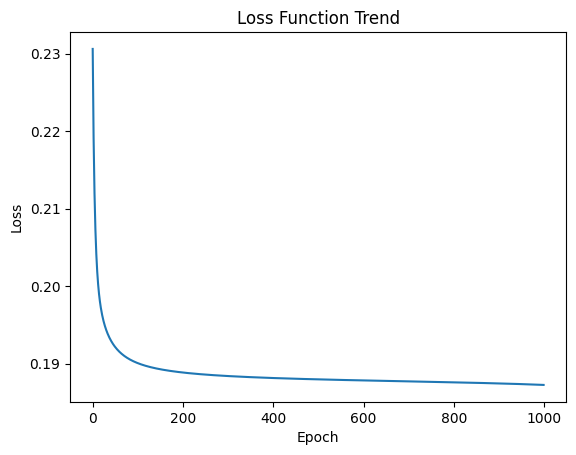

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
    fx = sigmoid(x)
    return fx * (1 - fx)

def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
    def __init__(self):
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()
    
    def feedforward(self, x):
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1

    def train(self, data, all_y_trues):
        learn_rate = 0.1
        epochs = 1000
        losses = []

        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)
                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)
                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1

                d_L_d_ypred = -2 * (y_true - y_pred)
                
                # Neuron o1
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)
                d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)
                
                # Neuron h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)
                
                # Neuron h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)
                
                # Update weights and biases
                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1
                
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2
                
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3
            
            # Calculate total loss at the end of each epoch
            y_preds = np.apply_along_axis(self.feedforward, 1, data)
            loss = mse_loss(all_y_trues, y_preds)
            losses.append(loss)
            if epoch % 10 == 0:
                print(f"Epoch {epoch} loss: {loss:.3f}")

        return losses

# Define dataset (weight, height)
data = np.array([
    [-2, -1],  # Alice
    [25, 6],   # Bob
    [17, 4],   # Charlie
    [-15, -6], # Diana
    
    [-23, 0],  # Eric
    [22, 5],  # Felix
    [45, 10], # Garnet
    [-30, -15], # Hermione
])

all_y_trues = np.array([
    1,  # Alice
    0,  # Bob
    0,  # Charlie
    1,  # Diana
    
    0,  # Eric
    0,  # Felix
    1,  # Garnet
    1,  # Hermione
])

# Train our neural network
network = OurNeuralNetwork()
losses = network.train(data, all_y_trues)

# Make predictions for all individuals
eric = np.array([-23, 0])
felix = np.array([22, 5])
garnet = np.array([45, 10])
hermione = np.array([-30, -15])

print(f"Eric: {network.feedforward(eric):.3f}")
print(f"Felix: {network.feedforward(felix):.3f}")
print(f"Garnet: {network.feedforward(garnet):.3f}")
print(f"Hermione: {network.feedforward(hermione):.3f}")

# Plot the loss function's trend
plt.plot(losses)
plt.title("Loss Function Trend")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()